In [46]:
"""
Created on 29th March 2018, using VPython notebook
@author: Myriam Munezero

"""
# Import the needed libraries
import vpython as vs 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import display

%matplotlib inline


In [ ]:
# Introduction

# This script explores the Index 2018 Economic Data that is released by the Heritage 
# Foundation: https://www.heritage.org/index/explore
# The Index, which was launched in 1995, evaluates nations in 12 aspects that affect economic freedom 
# grouped into four broad policy areas; 
# 1) Rule of law(property rights, judicial effectiveness, and government integrity); 
# 2) Government size(tax burden, government spending, and fiscal health); 
# 3) Regulatory effeciency (business freedom, labor freedom, and monetary freedom), and
# 4) Market openness (trade freedom, investment freedom, and financial freedom). 

# Scores in these 12 categories are averaged to create an overall 'score'. 
# Based on this average score, nations are classified into five categories; free, mostly free, 
# "moderately free", "mostly unfree", and "repressed",

# In particular, below I explore 1) the distribution of all World countries, African and European countries
# among these five categories, 2) the correlationship between various econmic variables, and 
# 3) use linear regression, to explore the relationship between various variables and the 
# "unemployment rate". This is because an assumed relationship exists, that higher governement 
# spending might decrease unemployment, 
# (source: https://www.linkedin.com/pulse/when-did-economic-growth-become-obsession-graham-kenny/?lipi=urn%3Ali%3Apage%3Ad_flagship3_feed%3BDxhcffA7RyilaJxoBHLqQA%3D%3D).


In [88]:
# Loading the 2018 data given by the Heritage Foundation in cvs format. Has been cleaned before importing
data18 = pd.read_csv("index2018_data.csv", sep=";", decimal=",", encoding='ISO-8859-1')
data18.head(n=5)

,CountryID,CountryName,Region,WorldRank,2018Score,PropertyRights,JudicalEffectiveness,GovernmentIntegrity,TaxBurden,Gov'tSpending,...,Gov'tExpenditure%ofGDP,Population(Millions),GDP(Billions.PPP),GDPGrowthRate(%),5YearGDPGrowthRate(%),GDPperCapita(PPP),Unemployment(%),Inflation(%),FDIInflow(Millions),PublicDebt(%ofGDP)
0,1,Afghanistan,Asia-Pacific,154.0,51.3,17.9,28.2,26.2,91.8,79.3,...,26.3,33.4,64.1,1.5,4.4,1918.60,8.5,4.4,99.6,8.3
1,2,Albania,Europe,65.0,64.5,54.1,25.4,39.9,85.1,72.7,...,30.1,2.9,34.2,2.6,2,11840.20,16.3,1.3,1124.3,71.5
2,3,Algeria,North-Africa,172.0,44.7,27.8,35.2,29,74,45.9,...,42.5,40.8,612.5,3.7,3.6,15026.50,11.2,6.4,1546,20.4
3,4,Angola,Sub-Saharan-Africa,164.0,48.6,36,25.4,18.9,82.4,69.1,...,32.1,27.4,187.3,3,4,6844.40,6.6,32.4,14363.6,71.9
4,5,Argentina,Americas,144.0,52.3,40.8,44.5,32.6,65.7,55.6,...,38.5,43.6,874.1,1.2,-0.2,20047.50,6.6,58.4,5745.2,51.3


In [89]:
# Create function to rename columns
def rename_columns(df):
    df.columns = ['country_id', 'country_name', 'region', 'world_rank', 'score', 
                  'property_rights', 'judical_effectiveness', 'government_integrity', 
                  'tax_burden', 'government_spending', 'fiscal_health', 'business_freedom', 
                  'labor_freedom', 'monetary_freedom', 'trade_freedom', 'investment_freedom', 
                  'financial_freedom', 'tariff_rate_perc', 'income_tax_rate_perc', 
                  'corporate_tax_rate_perc', 'tax_burden_perc_gdp', 
                  'government_expenditure_perc_gdp', 'population_in_millions', 
                  'gdp_in_billions_ppp', 'gdp_growth_rate_perc', '5year_gdp_growth_rate_perc', 
                  'gdp_per_capita_ppp', 'unemployment_perc', 
                  'inflation_perc', 'fdi_inflow_in_millions', 'public_debt_perc_gdp']
    
    return df

In [90]:
# Let's rename the columns for easier handling
data18 = rename_columns(data18)
data18.head(n=5)

,country_id,country_name,region,world_rank,score,property_rights,judical_effectiveness,government_integrity,tax_burden,government_spending,...,government_expenditure_perc_gdp,population_in_millions,gdp_in_billions_ppp,gdp_growth_rate_perc,5year_gdp_growth_rate_perc,gdp_per_capita_ppp,unemployment_perc,inflation_perc,fdi_inflow_in_millions,public_debt_perc_gdp
0,1,Afghanistan,Asia-Pacific,154.0,51.3,17.9,28.2,26.2,91.8,79.3,...,26.3,33.4,64.1,1.5,4.4,1918.60,8.5,4.4,99.6,8.3
1,2,Albania,Europe,65.0,64.5,54.1,25.4,39.9,85.1,72.7,...,30.1,2.9,34.2,2.6,2,11840.20,16.3,1.3,1124.3,71.5
2,3,Algeria,North-Africa,172.0,44.7,27.8,35.2,29,74,45.9,...,42.5,40.8,612.5,3.7,3.6,15026.50,11.2,6.4,1546,20.4
3,4,Angola,Sub-Saharan-Africa,164.0,48.6,36,25.4,18.9,82.4,69.1,...,32.1,27.4,187.3,3,4,6844.40,6.6,32.4,14363.6,71.9
4,5,Argentina,Americas,144.0,52.3,40.8,44.5,32.6,65.7,55.6,...,38.5,43.6,874.1,1.2,-0.2,20047.50,6.6,58.4,5745.2,51.3


In [91]:
# Let's count and view the missing values in each column
missing = data18.isnull()
missing.sum()

country_id                         0
country_name                       0
region                             0
world_rank                         6
score                              6
property_rights                    1
judical_effectiveness              1
government_integrity               1
tax_burden                         5
government_spending                3
fiscal_health                      2
business_freedom                   2
labor_freedom                      2
monetary_freedom                   2
trade_freedom                      3
investment_freedom                 2
financial_freedom                  5
tariff_rate_perc                   3
income_tax_rate_perc               2
corporate_tax_rate_perc            2
tax_burden_perc_gdp                6
government_expenditure_perc_gdp    4
population_in_millions             0
gdp_in_billions_ppp                4
gdp_growth_rate_perc               2
5year_gdp_growth_rate_perc         4
gdp_per_capita_ppp                 3
u

In [279]:
# Create a function to categorize and visualize the countries in each category
def country_categorization(df, title):
    n_data = df.shape[0]
    
    var = df['score'].astype(float)
    
    # Number of countries with score above 80 (Those countries with Score value above 80 are categorized as 'Free')
    free_countries = df.loc[(var >= 80)]
    n_free = free_countries.shape[0]

    # Number of countries with score above 80 (Those countries with Score value above 80 are categorized as 'Mostly Free')
    mostly_free_countries = df.loc[(var >= 70) & (var < 80)]
    n_mostly_free = mostly_free_countries.shape[0]

    # Number of countries with score above 80 (Those countries with Score value above 80 are categorized as 'Moderately Free')
    mod_free_countries = df.loc[(var >= 60) & (var < 70)]
    n_mod_free = mod_free_countries.shape[0]

    # Number of countries with score above 80 (Those countries with Score value above 80 are categorized as 'Free')
    mostly_unfree_countries = df.loc[(var >= 50) & (var < 60)]
    n_unfree = mostly_unfree_countries.shape[0]

    # Number of countries with score above 80 (Those countries with Score value above 80 are categorized as 'Free')
    repressed_countries = df.loc[(var < 50)]
    n_repressed = repressed_countries.shape[0]
    
    # Percentage of countries with score above 80
    percent = n_free*100/n_data


    # Print the results
    print("Total number of country data: {}".format(n_data))
    print("Countries with index score of 80 and above: {}".format(n_free))
    print("Countries with index score between 80 and 70: {}".format(n_mostly_free))
    print("Countries with index score between 70 and 60: {}".format(n_mod_free))
    print("Countries with index score between 60 and 50: {}".format(n_unfree))
    print("Countries with index score below 50: {}".format(n_repressed))

    print("Percentage of Countries that are 'free': {:.2f}%".format(percent))

   
    # Plot a histogram with the results
    temp = pd.DataFrame({ 'Category': pd.Series(['Free', 'Mostly free', 'Moderately free', 'Mostly unfree', 'Repressed']),
                         'Count': pd.Series([n_free, n_mostly_free, n_mod_free, n_unfree, n_repressed])
        
    })
 
    fig, axs = plt.subplots(ncols=1, figsize=(10,6))
    sns.barplot(x='Category', y='Count', data=temp, ax=axs)
    plt.title('Number of countries in each category')
    plt.tight_layout()
    for i, v in enumerate(temp['Count']):
        axs.text(i, v+.30, str(v), color='black', fontweight='bold')
    title = title + ".png"
    plt.savefig(title)
    plt.show()    
    plt.gcf().clear()   

Total number of country data: 186
Countries with index score of 80 and above: 6
Countries with index score between 80 and 70: 28
Countries with index score between 70 and 60: 62
Countries with index score between 60 and 50: 63
Countries with index score below 50: 21
Percentage of Countries that are 'free': 3.23%


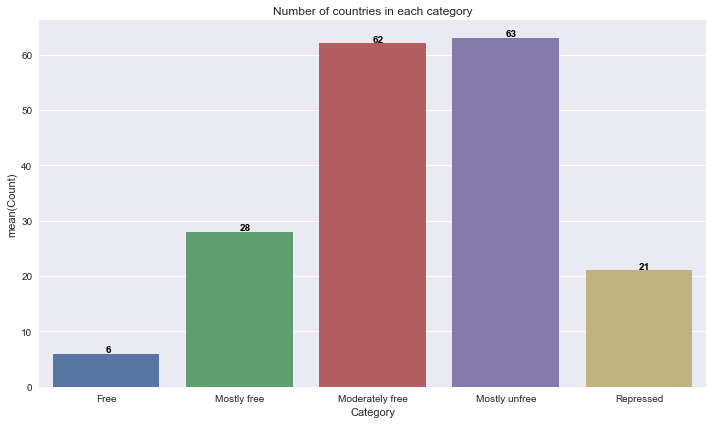

In [280]:
# Call the country_categorization function over the whole dataset
country_categorization(data18, "World-category")

Total number of country data: 53
Countries with index score of 80 and above: 0
Countries with index score between 80 and 70: 1
Countries with index score between 70 and 60: 9
Countries with index score between 60 and 50: 28
Countries with index score below 50: 13
Percentage of Countries that are 'free': 0.00%


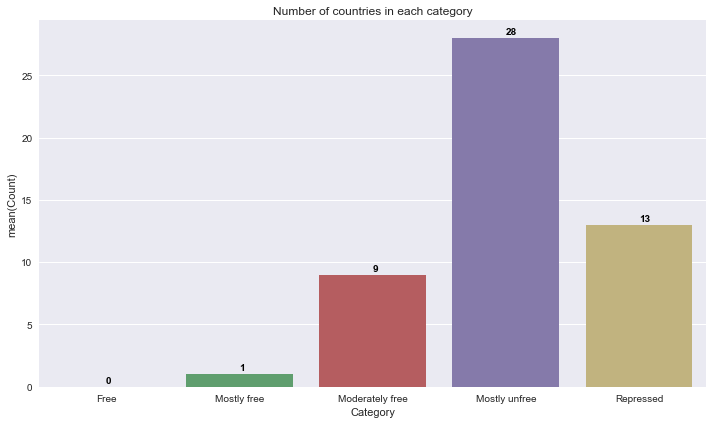

In [281]:
# Call the same country_categorization function over only African countries
data18_africa = data18.loc[data18['region'].isin(['North-Africa', 'Sub-Saharan-Africa'])]
data18_africa.head(n=5)

country_categorization(data18_africa, "Africa-category")

In [249]:

# plotting a heatmap of co-relations between features to help
# us gain more insights
def data_correlations(df, title):
    temp_data = df.iloc[:,4:].astype(float)
    temp_data.head(5)
    correlation = temp_data.corr()
    
    # display the correlations
    plt.figure(figsize=(14,12))
    heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")
    fig = heatmap.get_figure()
    title = title + ".png"
    fig.savefig(title)

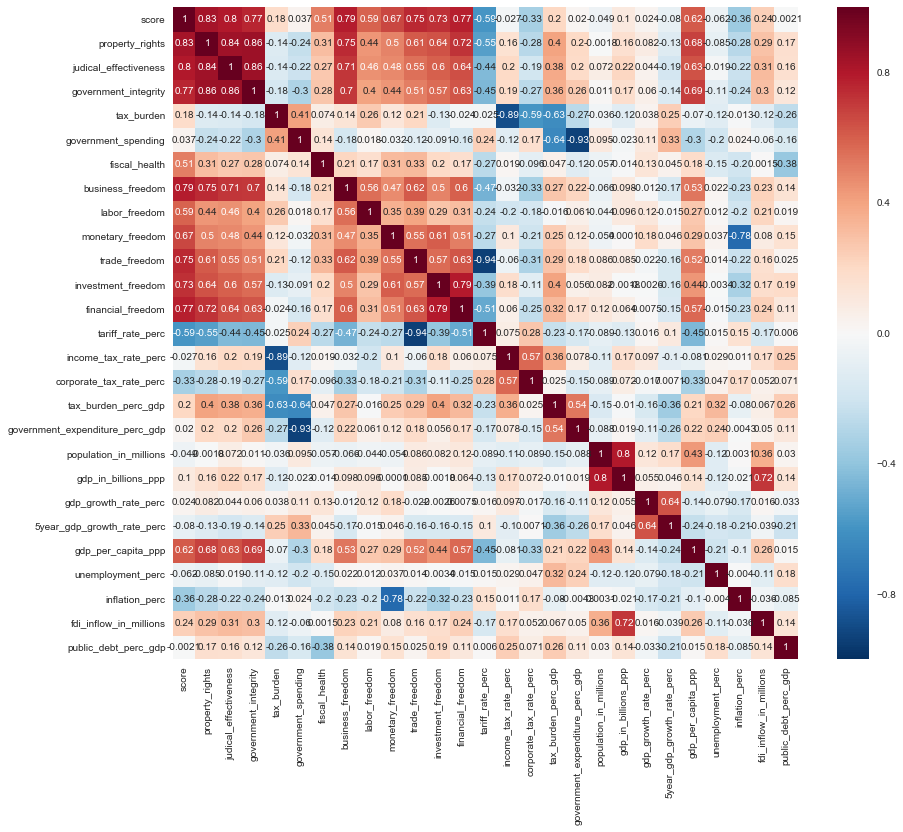

In [250]:
# Let's look at the correlations with the World data
data_correlations(data18, "heatmap-world")

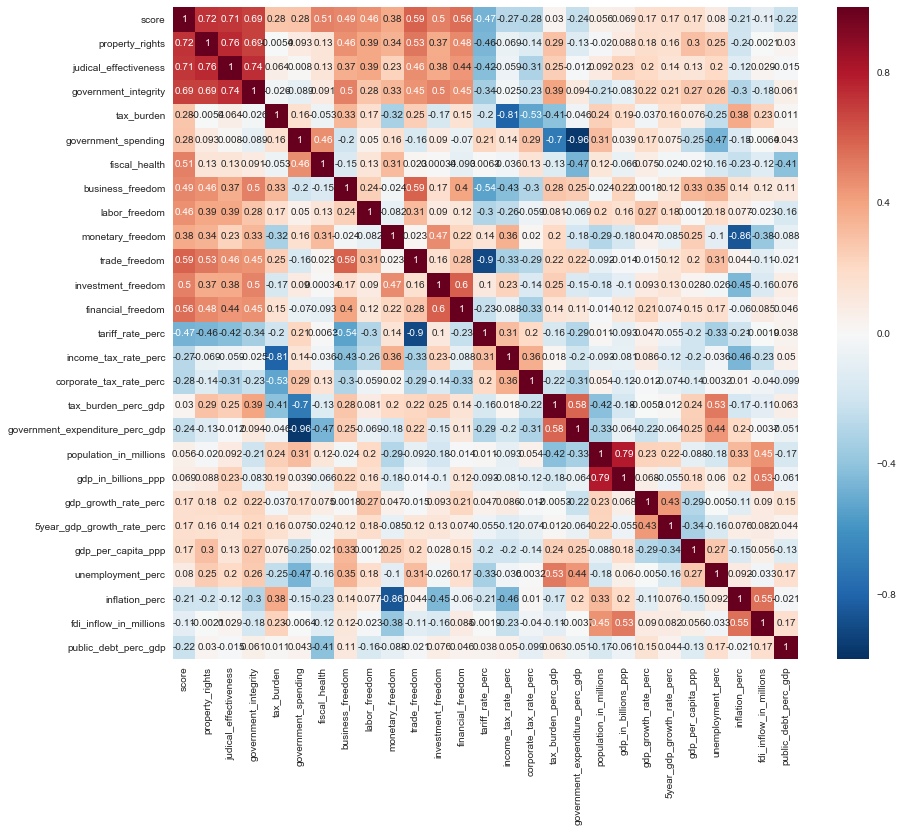

In [251]:
# What about the correlation in the Africa data
data_correlations(data18_africa, "heatmap-africa")

In [256]:
# Function to explore and visualize the relationship between 
# two variables that we are interested in exploring more
def explore_relation(df, value1, value2, title):
    # create a new dataframe containing just those two variables
    var = df.iloc[:,[value1,value2]].astype(float)
    #print(var.head(n=5))
    m = list(var)
    #print(m[0])
    
    grid_plot = sns.JointGrid(x=m[1], y=m[0], data=var, size=6)
    
    grid_plot = grid_plot.plot_joint(sns.regplot, scatter_kws={"s":10})
    
    grid_plot = grid_plot.plot_marginals(sns.distplot)
    
    title = title + ".png"
    grid_plot.savefig(title)
    

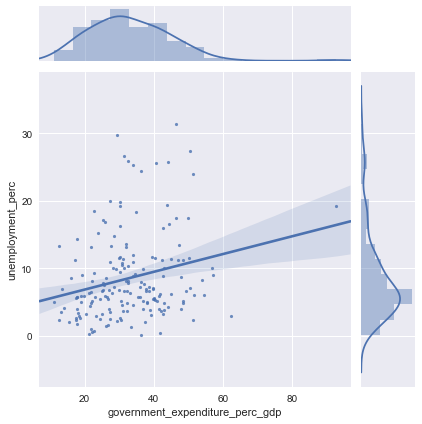

In [257]:
# You can try to see the relationship between any two variables
var1 = data18.columns.get_loc("unemployment_perc")
var2 = data18.columns.get_loc("government_expenditure_perc_gdp")
explore_relation(data18, var1, var2, "World-UnemplPerc-vs-GovnExpPerc")



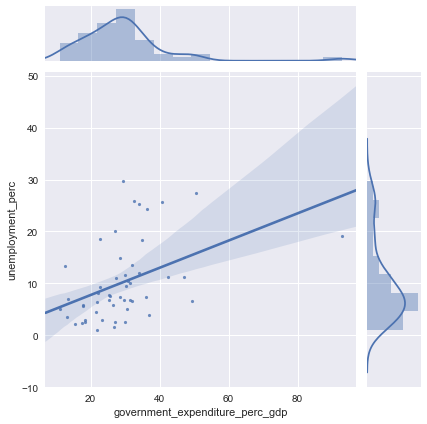

In [258]:
# You can try to see the relationship between any two variables of the Africa data
var1 = data18_africa.columns.get_loc("unemployment_perc")
var2 = data18_africa.columns.get_loc("government_expenditure_perc_gdp")
explore_relation(data18_africa, var1, var2, "Africa-UnemplPerc-vs-GovnExpPerc")

Total number of country data: 45
Countries with index score of 80 and above: 2
Countries with index score between 80 and 70: 16
Countries with index score between 70 and 60: 21
Countries with index score between 60 and 50: 5
Countries with index score below 50: 0
Percentage of Countries that are 'free': 4.44%


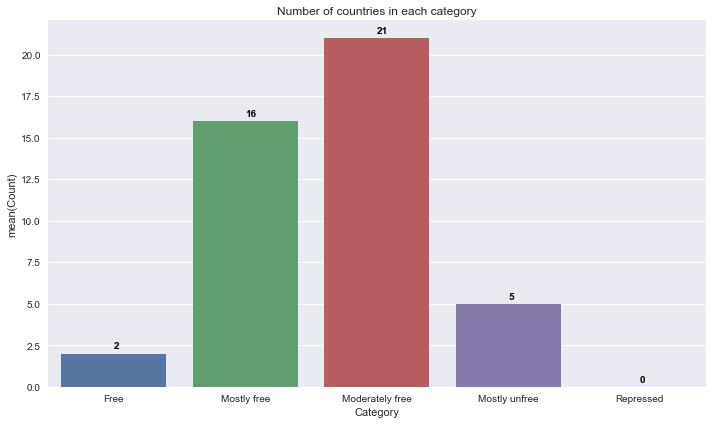

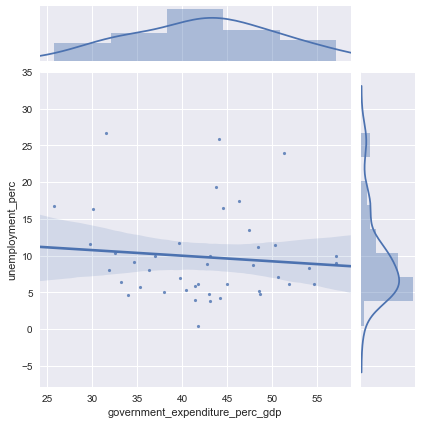

In [282]:
# Let's compare with the Europe countries only
data18_europe = data18.loc[data18['region'].isin(['Europe'])]
data18_europe.head(n=5)

country_categorization(data18_europe, "Europe-category")
# You can try to see the relationship between any two variables of the Europe data
var1 = data18_europe.columns.get_loc("unemployment_perc")
var2 = data18_europe.columns.get_loc("government_expenditure_perc_gdp")
explore_relation(data18_europe, var1, var2, "Europe-UnemplPerc-vs-GovnExpPerc")


In [163]:
# let's also look at the outliers
# Function to remove any outliers and return a dataframe
def remove_outliers(df):
    df2 = df.iloc[:,4:].astype(float)
    # For each feature find the data points with extreme high or low values
    for feature in df2.keys():
        Q1 = np.nanpercentile(df2[feature], q=25)
        Q3 = np.nanpercentile(df2[feature], q=75)
        interquartile_range = Q3 - Q1
        step = 1.5 * interquartile_range
        
        # Display the outliers
        print("Data points considered outliers for the feature'{}':".format(feature))
        display(df2[~((df2[feature] > Q1 - step) & (df2[feature] <= Q3 + step))])
        
        # Optional: Select the indices for data points you wish to remove
        outliers = []
        
        # Remove the outliers direct, if any were specified
        df = df2.drop(df2.index[outliers]).reset_index(drop = True)
        
    return df

In [306]:
# Remove outliers
# I have commented it out now for display purposes, but should uncomment to remove the outliers.

# data18_out_rm = remove_outliers(data18)
# data18_africa_out_rm = remove_outliers(data18_africa)
# data18_europe_out_rm = remove_outliers(data18_europe)

In [301]:
# Start building doing the linear regression
from sklearn.linear_model import LinearRegression
# first fill the NAs as linear regression will not fit on that
# I select to fill with 0s
data18_out_rm = data18_out_rm.fillna(0)
data18_africa_out_rm = data18_out_rm.fillna(0)
data18_europe_out_rm = data18_out_rm.fillna(0)

my_regr_data = data18_africa_out_rm # you can replace the data18_out_rm_africa on this line with the Africa or Europe data 

# Get three features, i.e "all float variable", "the econmic freedom variables", and the "goverment expenditure"
# The dependent variable to predict is "unemployment rate"
X_all = my_regr_data.iloc[:, my_regr_data.columns != 'unemployment_perc'].astype(float)
X_freedoms = my_regr_data.iloc[:,1:13].astype(float)
X_gov = my_regr_data['government_expenditure_perc_gdp'].astype(float)
y = my_regr_data['unemployment_perc'].astype(float)



In [302]:
# Function to run model on the different feature inputs and return the root mean squared errors
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

def build_test_model(x_var, y_var):
    n_features = x_var.shape
    X_train, X_test, y_train, y_test = train_test_split(x_var, y_var, test_size=.20, random_state=0)
    
    #if type() == pandas.core.series.Series only one column then reshape both train and test
    #else
    if type(x_var) == pd.Series:
        X_train = X_train.values.reshape(-1, 1)
        X_test = X_test.values.reshape(-1, 1)
    else:
        pass
        
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    
    rmsTrain = sqrt(mean_squared_error(y_train, lm.predict(X_train)))
    
    # Let's use the linear model to predict unemployment on the test set
    y_pred = lm.predict(X_test)
    
    rmsTest = sqrt(mean_squared_error(y_test, y_pred))

    # Print the results
    print("Number of features inputted: {}".format(n_features))
    # print("------")
    #print("Regression line slope: {}".format(lm.coef_)) # uncomment to get the coefficients
    #print("Regression line intercept: {}".format(lm.intercept_)) # uncomment to get the intercept
    print("Root Meat Squared Error on training set: {}".format(rmsTrain))
    print("Root Meat Squared Error on test set: {}".format(rmsTest))
    print("------END OF ONE FEATURE INPUT-----")

In [303]:
# Let's use the three features to build the linear model

feature_set = [X_gov, X_freedoms, X_all]

for feature in feature_set:
    build_test_model(feature, y)

Number of features inputted: (186,)
Root Meat Squared Error on training set: 6.172190944089952
Root Meat Squared Error on test set: 6.654423879340573
------END OF ONE FEATURE INPUT-----
Number of features inputted: (186, 12)
Root Meat Squared Error on training set: 5.846519074280923
Root Meat Squared Error on test set: 6.520627535872894
------END OF ONE FEATURE INPUT-----
Number of features inputted: (186, 26)
Root Meat Squared Error on training set: 5.122840391514399
Root Meat Squared Error on test set: 6.88723505079234
------END OF ONE FEATURE INPUT-----


In [304]:
# Assessment

# From the results, we see that there is a lower root mean squared error when using just the 
# 12 Freedom features.

# Further analysis of the results is discussed here - http://myriammunezero.com/economic-data-analysis/